# Goal
Surprise Housing uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. 

 

The company wants to know:

    1. Which variables are significant in predicting the price of a house, and

    2. How well those variables describe the price of a house.

 
This model will be used to understand how exactly the prices vary with the variables, accordingly manipulate the strategy and concentrate on areas that will yield high returns. 

Data Dictionary available [here](https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt)

In [1]:
import csv, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  
import statsmodels.regression.linear_model as lm ## summary

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#EDA

In [2]:
houses = pd.read_csv("https://docs.google.com/uc?export=download&id=1uJZlk-OYGvgfkFoNix3gx2fDZsvO9r6O",encoding = 'unicode_escape')
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [3]:
## checking NAs
na_df = round(100*houses.isna().sum()/len(houses.index),2)
na_df[na_df>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [4]:
houses[[col for col in houses.columns if col.startswith("Bs")]].loc[houses["BsmtQual"].isna()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0


In [5]:
houses[[col for col in houses.columns if col.startswith("Gar")]].loc[houses["GarageType"].isna()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


Seems BsmtQual/Cond/etc , MasVnrType/Area and Garage related NAs are due to absence of Basement.



Dropping cols with >80% NAs and Id col first.

In [6]:
houses.drop(["Id","Alley","PoolQC","Fence","MiscFeature"],inplace=True,axis=1)

### Drop columns with no information, with >90% skewness

In [7]:
skewed_cols = []
for col in houses.columns:
  if max(houses[col].value_counts())*100/len(houses[col]) >= 90:
    skewed_cols.append(col)

skewed_cols
# houses['Heating'].value_counts()

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [8]:
houses.drop(skewed_cols, axis=1, inplace=True)

In [9]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [10]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


Following variables should be first converted into categorical type:
MSSubClass, OverallQual, OverallCond . Ignoring year to datetime conversion as of now for simplicity

In [11]:
houses.MSSubClass = houses.MSSubClass.astype("category")
houses.OverallQual = houses.OverallQual.astype("category")
houses.OverallCond = houses.OverallCond.astype("category")

Following variables seem to have **outliers**: "MasVnrArea","BsmtFinSF2","2ndFlrSF","BsmtFullBath","WoodDeckSF","EnclosedPorch"

In [12]:
houses[["MasVnrArea","BsmtFinSF2","2ndFlrSF","BsmtFullBath","WoodDeckSF","EnclosedPorch"]]

,MasVnrArea,BsmtFinSF2,2ndFlrSF,BsmtFullBath,WoodDeckSF,EnclosedPorch
0,196.0,0,854,1,0,0
1,0.0,0,0,0,298,0
2,162.0,0,866,1,0,0
3,0.0,0,756,1,0,272
4,350.0,0,1053,1,192,0
...,...,...,...,...,...,...
1455,0.0,0,694,0,0,0
1456,119.0,163,0,1,349,0
1457,0.0,0,1152,0,0,0
1458,0.0,1029,0,1,366,112


In [13]:
houses[["MasVnrArea","BsmtFinSF2","2ndFlrSF","BsmtFullBath","WoodDeckSF","EnclosedPorch"]].describe().T

,count,mean,std,min,25%,50%,75%,max
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.0,0.0,1474.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.0,0.0,728.0,2065.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.0,0.0,1.0,3.0
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.0,0.0,168.0,857.0
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.0,0.0,0.0,552.0


It seems zeros here represent absence of that particular feature. We can proceed to derive a boolean feature for each of this column to signify the presence of that feature. But for the sake of simplicity lets first proceed without adding those features. 


Checking data type of NA cols

In [14]:
na_cols = [ col for col in  na_df[na_df>0].index.tolist() if col in houses.columns]
houses[na_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   FireplaceQu   770 non-null    object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [15]:
houses[["LotFrontage","MasVnrArea","GarageYrBlt"]].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


In [16]:
numeric_na = houses[na_cols].select_dtypes(["float64","int64"])
numeric_na[numeric_na.isna()]

,LotFrontage,MasVnrArea,GarageYrBlt
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1455,NaN,NaN,NaN
1456,NaN,NaN,NaN
1457,NaN,NaN,NaN
1458,NaN,NaN,NaN


###Imputing NAs

From above observations we impute numeric and categorical variables with 0 and not available

In [17]:
na_df = round(100*houses.isna().sum()/len(houses.index),2)
cols = na_df[na_df>0].index.tolist()
# houses[cols].info()
for col in cols:
  if houses[col].dtype=="float64":
    houses[col].fillna(0, inplace=True) ## median in outliers
  elif houses[col].dtype=="object":
    houses[col].fillna( "notavailable", inplace=True) ## notavailable and not mode, since Eg:garage NA means is not there.

In [18]:
## verifying No NAs
na_df = round(100*houses.isna().sum()/len(houses.index),2)
na_df[na_df>0]

Series([], dtype: float64)

##Derived Features

In [19]:
houses["age"] = houses["YrSold"]-houses["YearBuilt"]

## Analysing Target variable

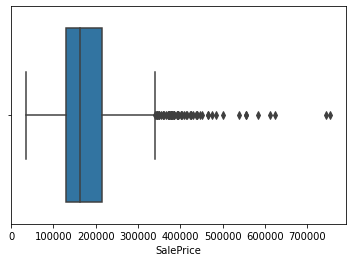

In [20]:
sns.boxplot(houses["SalePrice"])

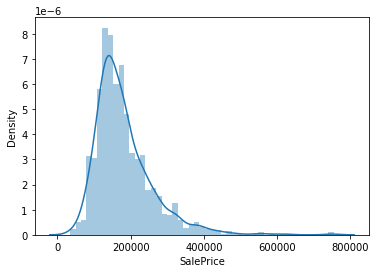

In [21]:
sns.distplot(houses["SalePrice"])
plt.show()

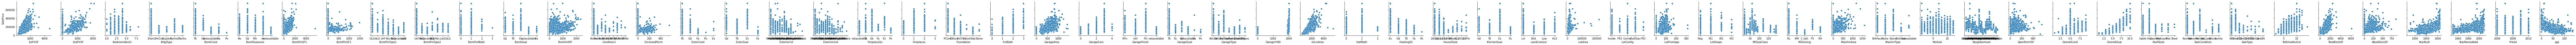

In [22]:
g = sns.pairplot(data = houses,y_vars=['SalePrice'], x_vars = houses.columns.difference(["SalePrice"]))#, kind="reg"
plt.show()

## Correlation with numeric variables

In [23]:
houses_numeric = houses.select_dtypes(exclude=['object',"category"])
cor = houses_numeric.corr()

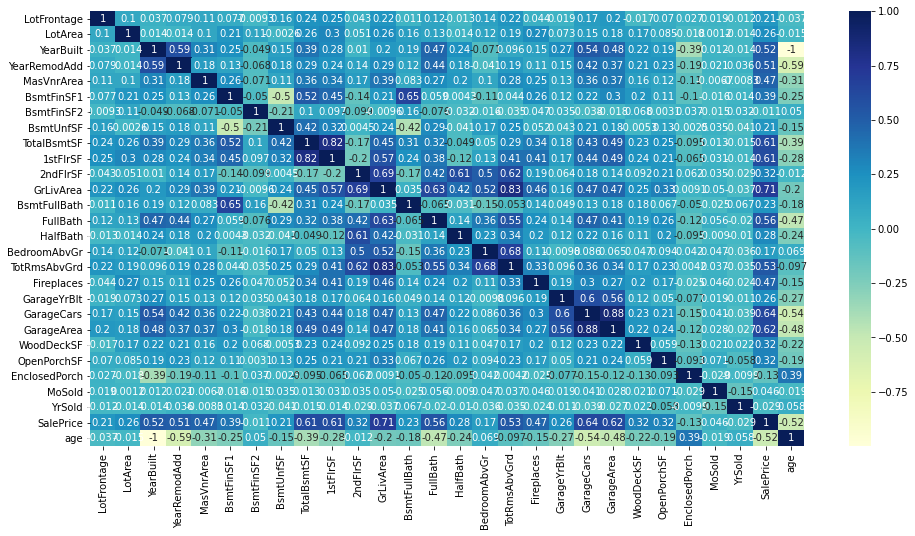

In [24]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Positively corrrelated variables with target variable: garage, GRLiveArea, etc

Negatively corrrelated variables with target variable: age

Some independent variables have correlations among them eg ground living area and total rms above ground.


##Correlation with categorical variables (Segmented univariate analysis)

In [25]:
houses_categorical = houses.select_dtypes(exclude=['float64',"int64"])
houses_categorical

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Gd,notavailable,Attchd,RFn,TA,WD,Normal
1,20,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,Attchd,RFn,TA,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,TA,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,Detchd,Unf,TA,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,6,5,Gable,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,Ex,TA,TA,Attchd,RFn,TA,WD,Normal
1456,20,RL,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,6,6,Gable,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,TA,TA,TA,Attchd,Unf,TA,WD,Normal
1457,70,RL,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,7,9,Gable,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,Ex,Gd,Gd,Attchd,RFn,TA,WD,Normal
1458,20,RL,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,6,Hip,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,Gd,Gd,notavailable,Attchd,Unf,TA,WD,Normal


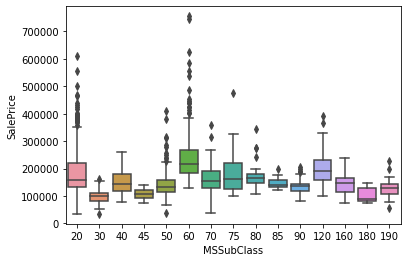

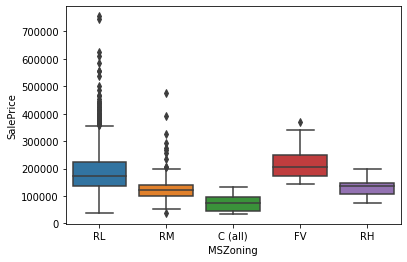

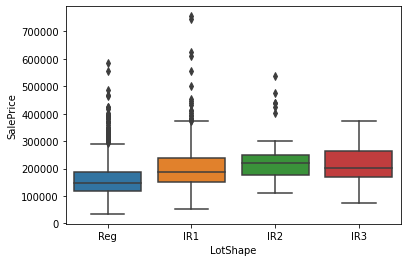

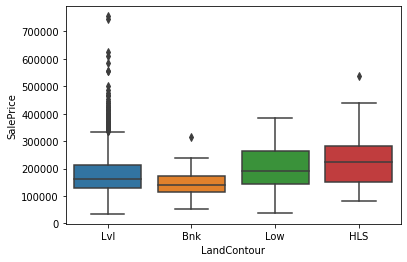

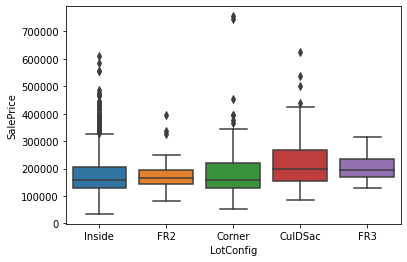

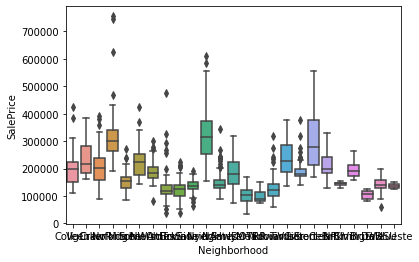

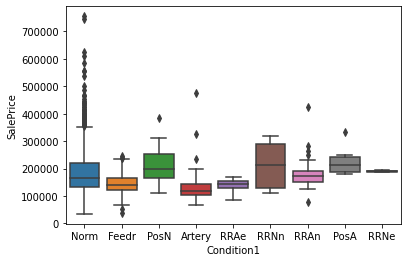

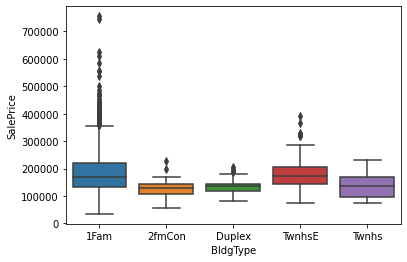

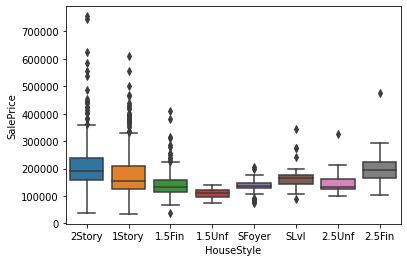

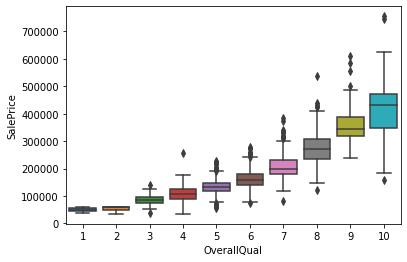

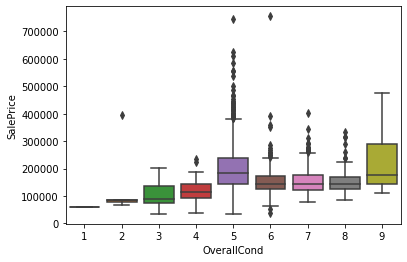

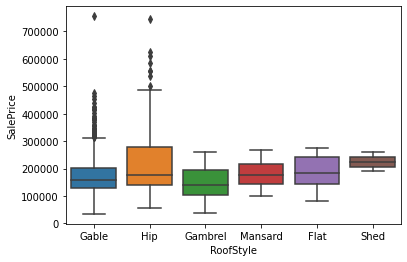

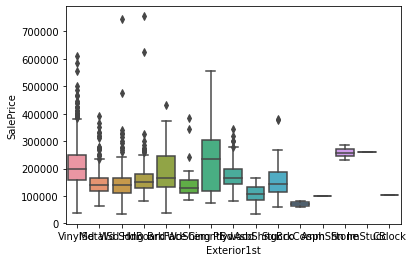

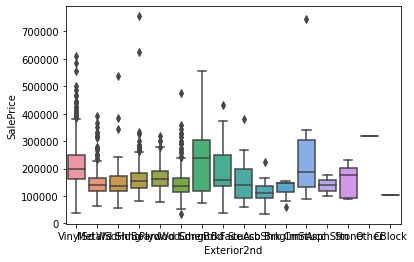

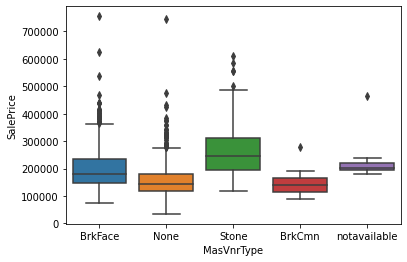

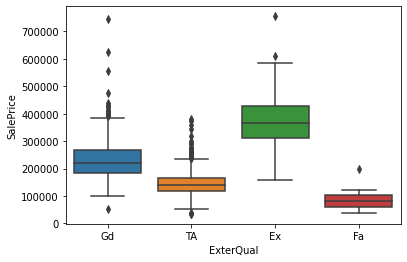

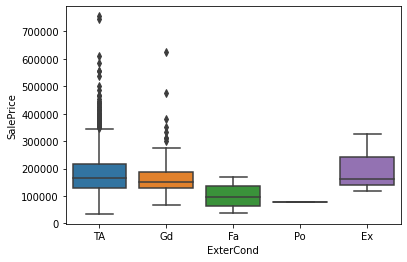

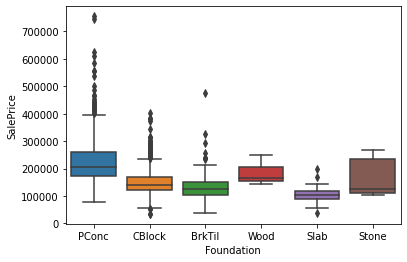

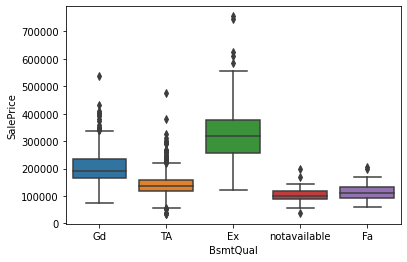

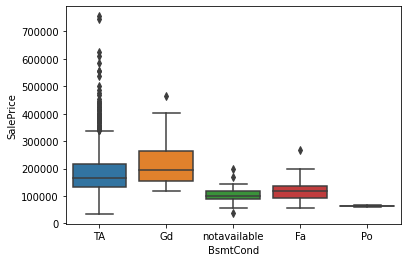

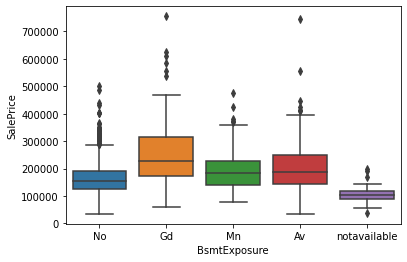

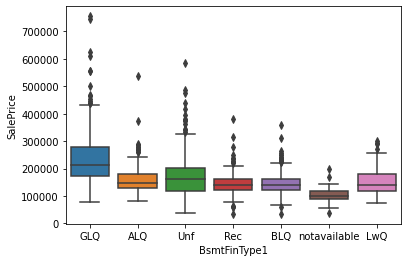

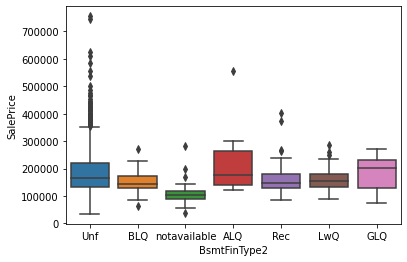

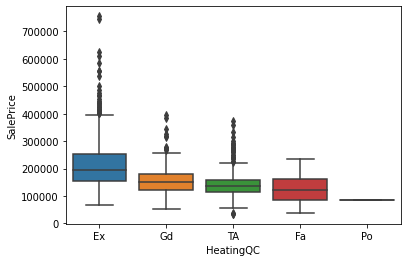

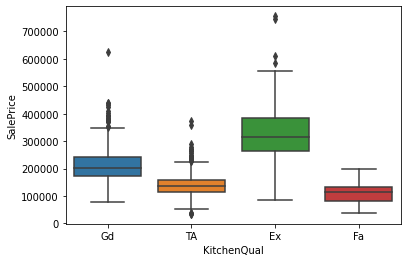

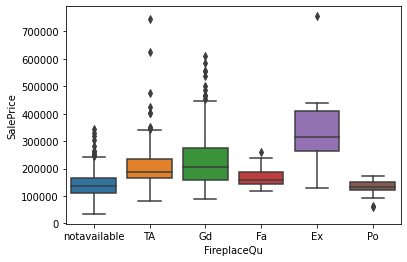

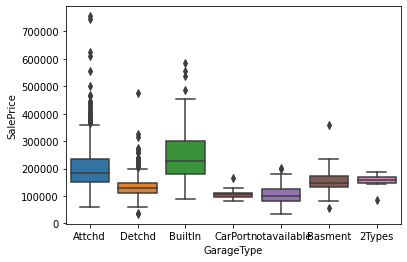

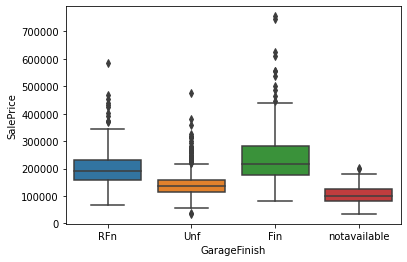

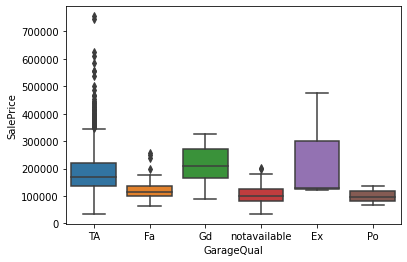

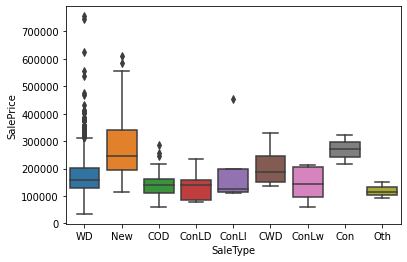

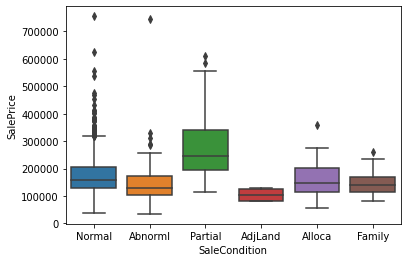

In [26]:
# plt.figure(figsize=(20, 12))

for i,col in enumerate(houses_categorical.columns):
  plt.figure(i)
  sns.boxplot(x = col, y = 'SalePrice', data = houses)

plt.show()

Variables such as Overall Quality, Electrical, etc seem show a relationship with target variable

#Model data Preparation

**Creating dummy variables**

In [27]:
# Dummy categorical variables
## keeping n-1 levels for min predictors and hence better adjusted r-squared
houses = pd.get_dummies( houses , columns=houses.select_dtypes(["object","category"]).columns, drop_first = True) 
houses


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,...,BsmtFinType2_notavailable,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_notavailable,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_notavailable,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_notavailable,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_notavailable,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,0,2,2008,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,0,5,2007,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,0,9,2008,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,272,2,2006,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,0,12,2008,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,1647,0,2,1,3,7,1,1999.0,2,460,0,40,0,8,2007,175000,8,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,2073,1,2,0,3,7,2,1978.0,2,500,349,0,0,2,2010,210000,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,2340,0,2,0,4,9,2,1941.0,1,252,0,60,0,5,2010,266500,69,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,1078,1,1,0,2,5,0,1950.0,1,240,366,0,112,4,2010,142125,60,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


**Train/Test split**

In [28]:
train, test = train_test_split( houses, train_size=0.8,    test_size = 0.2, random_state=123)

**Rescaling**

In [29]:
scaler = StandardScaler()

In [30]:
# cols = X.columns #Storing column names in cols, since column names are (annoyingly) lost after scaling (the df is converted to a numpy array)
# X = pd.DataFrame(scale(X)) ## standard
# X.columns = cols
# X
# y = pd.Series(scale(y), name = y.name) ## standard
# y
num_vars = houses.select_dtypes(["float64","int64"]).columns  
train[num_vars] = scaler.fit_transform(train[num_vars])
print(train)

## precomputing scaled test set withing fitting
test[num_vars] = scaler.transform(test[num_vars])

      LotFrontage   LotArea  ...  SaleCondition_Normal  SaleCondition_Partial
318      0.951771 -0.048155  ...                     1                      0
580     -1.752506  0.449837  ...                     1                      0
961     -1.752506  0.199193  ...                     1                      0
78       0.410915  0.045172  ...                     1                      0
5        0.801533  0.399879  ...                     1                      0
...           ...       ...  ...                   ...                    ...
1041    -1.752506 -0.130003  ...                     1                      0
1122    -1.752506 -0.151687  ...                     0                      0
1346    -1.752506  1.108442  ...                     1                      0
1406     0.350820 -0.202815  ...                     1                      0
1389     0.050345 -0.462706  ...                     1                      0

[1168 rows x 229 columns]


**X/y split**

In [31]:
X_train = train.drop(['SalePrice'],axis=1)
y_train = train['SalePrice']

X_test = test.drop(['SalePrice'],axis=1)
y_test = test['SalePrice']

We are not creating any more derived features other then age since data to feature ratio is already low.

## Model building and Evaluation

### Feature selection
Use Gridsearch for RFE to pick top n features

In [32]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 123) ## 5 giving negative values

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(3,30,2))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      #, n_jobs=-1 , results impacted

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  2.3min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [3, 5, 7, 9, 11, 13, 15, 17,
                                                   19, 21, 23, 25, 27, 29]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [33]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [34]:
# plotting cv results
def gridCV_plot(cv_results):
  plt.figure(figsize=(16,6))
  plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
  plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
  plt.xlabel('number of features')
  # plt.ylim(0,1)
  plt.ylabel('r-squared')
  plt.title("Optimal Number of Features")
  plt.legend(['test score', 'train score'], loc='upper left')
  plt.show()

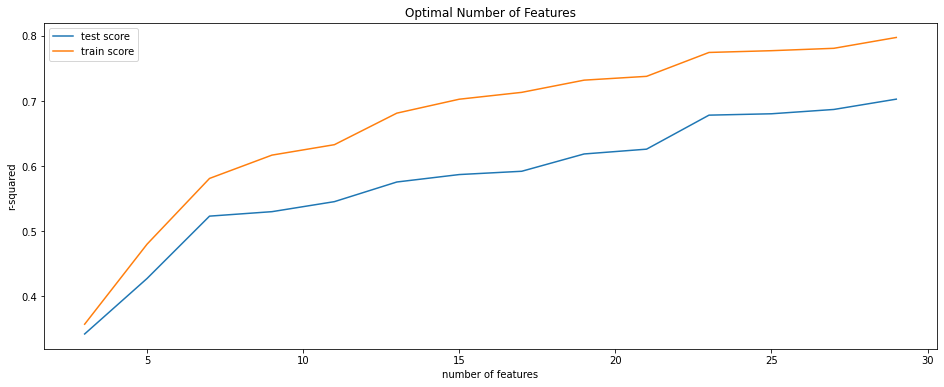

In [35]:
gridCV_plot(cv_results)

Use RFE to pick top 29 features

In [36]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'n_features_to_select': 29}


In [37]:
# Use RFE to find top 29 features
lm = LinearRegression()
lm.fit(X_train, y_train)

# 60 gives 89% R2, but inf vif for many features
rfe = RFE(lm, 29, verbose=0)             
rfe = rfe.fit(X_train, y_train)
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col_rfe = X_train.columns[rfe.support_]
print(col_rfe)
print(X_train.columns[~rfe.support_])

Index(['YearBuilt', 'GrLivArea', 'YrSold', 'age', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_2.5Fin',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_9',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior2nd_CmentBd',
       'ExterCond_Po', 'BsmtQual_Fa', 'BsmtCond_Po', 'BsmtCond_notavailable',
       'BsmtExposure_Gd', 'BsmtFinType2_notavailable'],
      dtype='object')
Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
    

In [38]:
lm = LinearRegression()
lm.fit(X_train[col_rfe], y_train)
y_pred = lm.predict(X_test[col_rfe])
r2 = r2_score(y_test, y_pred)
print(r2)
## using all features gives neagative test r2 **

0.8401388659251484


In [39]:
X_train_rfe = X_train[col_rfe]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:45:53   Log-Likelihood:                -641.35
No. Observations:                1168   AIC:                             1339.
Df Residuals:                    1140   BIC:                             1480.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

We get decent R2

In [40]:
def _vif(data):
  vif = pd.DataFrame()
  vif['Features'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif


In [41]:
_vif(X_train_rfe)

,Features,VIF
29,BsmtFinType2_notavailable,inf
1,YearBuilt,inf
27,BsmtCond_notavailable,inf
3,YrSold,inf
4,age,inf
0,const,121.69
22,Exterior1st_CemntBd,25.23
23,Exterior2nd_CmentBd,25.13
10,MSZoning_RL,20.81
11,MSZoning_RM,16.50


We would need to remove variables sequentially with high vif >5

Instead of removing each high vif feature sequentially and retraining, lets use lasso for that.

In [42]:
# col_rfe = col_rfe.drop(["SaleType_New"],axis=1)
# X_train_rfe = X_train[col_rfe]
# X_train_rfe = sm.add_constant(X_train_rfe)  ## high p-value indicates can be removed (not needed since already normalised)
# lm = sm.OLS(y_train,X_train_rfe).fit() 
# print(lm.summary())

In [43]:
# _vif(X_train_rfe)

In [44]:
# ## Again removing "Exterior1st_CemntBd" due to >5 vif
# col_rfe = col_rfe.drop(["Exterior1st_CemntBd"])
# X_train_rfe = X_train[col_rfe]
# X_train_rfe = sm.add_constant(X_train_rfe)  ## high p-value indicates can be removed (not needed since already normalised)
# lm = sm.OLS(y_train,X_train_rfe).fit() 
# print(lm.summary())

In [45]:
# _vif(X_train_rfe)

In [46]:
# ## Again removing "BsmtQual_TA" due to >5 vif
# col_rfe = col_rfe.drop(["BsmtQual_TA"])
# X_train_rfe = X_train[col_rfe]
# X_train_rfe = sm.add_constant(X_train_rfe)  ## high p-value indicates can be removed (not needed since already normalised)
# lm = sm.OLS(y_train,X_train_rfe).fit() 
# print(lm.summary())

In [47]:
# _vif(X_train_rfe)

In [48]:
# ## vif almost wihin limit <=5, final variables
# feats = col_rfe.tolist()
# feats

### Residual Analysis

In [49]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

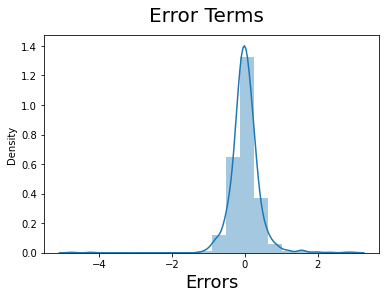

In [50]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [51]:
res = y_train-y_train_pred

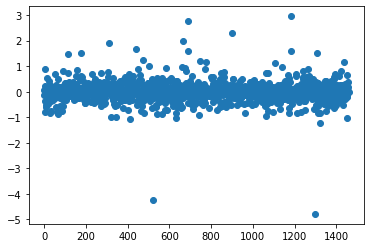

In [52]:
plt.scatter(X_train_rfe.index,res)
plt.show()

homoscedastic, and normally distributed error terms confirm absence of nn-linearity

## Ridge Regression

Using gridsearch for alpha tuning

In [53]:
# plotting cv results
def gridCV_plot(cv_results):
  plt.figure(figsize=(16,6))
  plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
  plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
  plt.xlabel('alpha')
  # plt.ylim(-2,1)
  plt.ylabel('neg_mean_absolute_error')
  plt.title("Optimal alpha")
  plt.legend(['test score', 'train score'], loc='upper left')
  plt.show()

In [54]:
params = {'alpha': [0.1,0.3,0.5,0.7  ] + list(range(1,9,1)) + list(range(10,201,3))}
 

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  #neg_mean_absolute_error
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col_rfe], y_train) 

Fitting 5 folds for each of 76 candidates, totalling 380 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 1, 2, 3, 4, 5, 6, 7, 8,
                                   10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40,
                                   43, 46, 49, 52, 55, 58, 61, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

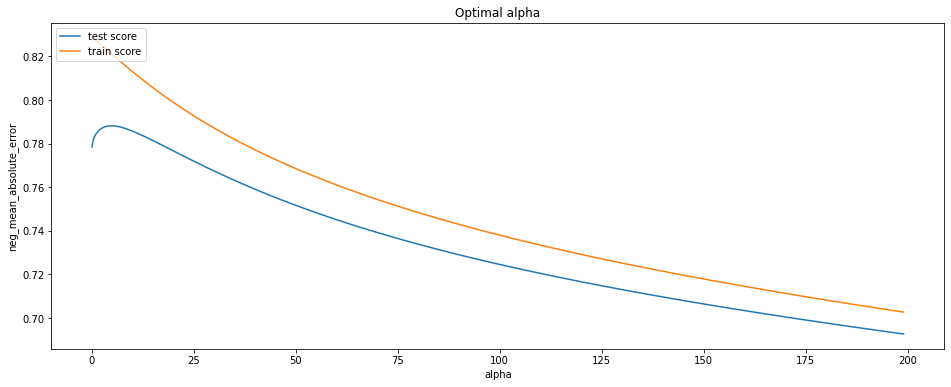

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
gridCV_plot(cv_results)
# cv_results

In [56]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5}


In [57]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col_rfe], y_train)
print(ridge.coef_)

[ 0.13475861  0.45315628  0.00441919 -0.13430854 -0.40463359 -0.4239505
 -0.23341814  0.37943722  0.02666348  0.1969299   0.07477032 -0.30890097
  0.49981601  0.61271274  0.50023347 -0.20396131  0.41202416  0.98614708
  0.79429674  0.34062818  0.31148008  0.10969415 -0.06650437 -0.11924112
 -0.00148319 -0.17275351 -0.15737838  0.4538946  -0.15737838]


In [58]:
## printing metrics method
def evaluate(model, X_train, X_test, y_train, y_test):
  # Lets calculate some metrics such as R2 score, RSS and RMSE
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  metric2 = []
  r2_train_lr = r2_score(y_train, y_pred_train)
  print("Training R2: ",r2_train_lr)
  metric2.append(r2_train_lr)

  r2_test_lr = r2_score(y_test, y_pred_test)
  print("Test R2: ",r2_test_lr)
  metric2.append(r2_test_lr)

  rss1_lr = np.sum(np.square(y_train - y_pred_train))
  print("Training RSS: ",rss1_lr)
  metric2.append(rss1_lr)

  rss2_lr = np.sum(np.square(y_test - y_pred_test))
  print("Test RSS: ",rss2_lr)
  metric2.append(rss2_lr)

  mse_train_lr = mean_squared_error(y_train, y_pred_train)
  print("Training MSE: ",mse_train_lr)
  metric2.append(mse_train_lr**0.5)

  mse_test_lr = mean_squared_error(y_test, y_pred_test)
  print("Test MSE: ",mse_test_lr)
  metric2.append(mse_test_lr**0.5)
  return metric2

In [59]:
metric1 = evaluate(ridge, X_train[col_rfe], X_test[col_rfe], y_train, y_test)

Training R2:  0.8188700323785139
Test R2:  0.8350264909956593
Training RSS:  211.5598021818959
Test RSS:  46.965683145379295
Training MSE:  0.1811299676214862
Test MSE:  0.1608413806348606


Model seems to not overfit/underfit since test/train R2 is similar

Doubling Ridge alpha

In [60]:
alpha = 5*2

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train[col_rfe], y_train) 

print(ridge.coef_)
metric3 = evaluate(ridge, X_train[col_rfe], X_test[col_rfe], y_train, y_test)
print(metric3)

[ 0.1395044   0.46704318  0.00615164 -0.13896946 -0.37923903 -0.38421217
 -0.16723927  0.27146861 -0.02439298  0.13351216  0.00714909 -0.22394176
  0.43236329  0.59629888  0.42940109 -0.15189018  0.39491427  0.85705145
  0.6246911   0.27967869  0.27429909  0.07259665 -0.01694584 -0.06494687
  0.0014205  -0.09721454 -0.14792791  0.4443159  -0.14792791]
Training R2:  0.8128185660574988
Test R2:  0.8274904554577008
Training RSS:  218.6279148448414
Test RSS:  49.111088546429215
Training MSE:  0.1871814339425012
Test MSE:  0.1681886594055795
[0.8128185660574988, 0.8274904554577008, 218.6279148448414, 49.111088546429215, 0.43264469711589115, 0.41010810697373384]


Test set R2 score gets slightly reduced after doubling regularization param alpha

## Lasso Regression

In [61]:
lasso = Lasso()
params = {'alpha': list(np.arange(0.0001,0.025,0.0005)) + [0.03 ,0.04, 0.1 , 0.5, 1, 5, 10, 20, 50]}

#LassoCV

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', #neg_mean_absolute_error
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col_rfe], y_train) 

Fitting 5 folds for each of 59 candidates, totalling 295 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 295 out of 295 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0006000000000000001, 0.0011,
                                   0.0016, 0.0021, 0.0026, 0.0031, 0.0036,
                                   0.0041, 0.004600000000000001, 0.0051, 0.0056,
                                   0.0061, 0.006600000000000001, 0.0071, 0.0076,
                                   0.0081, 0.0086, 0.0091, 0.0096, 0.0101,
                                   0.0106, 0.011099999999999999, 0.0116, 0.0121,
                                   0.0126, 0.0131, 0.0136, 0.0141, 0.0146, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


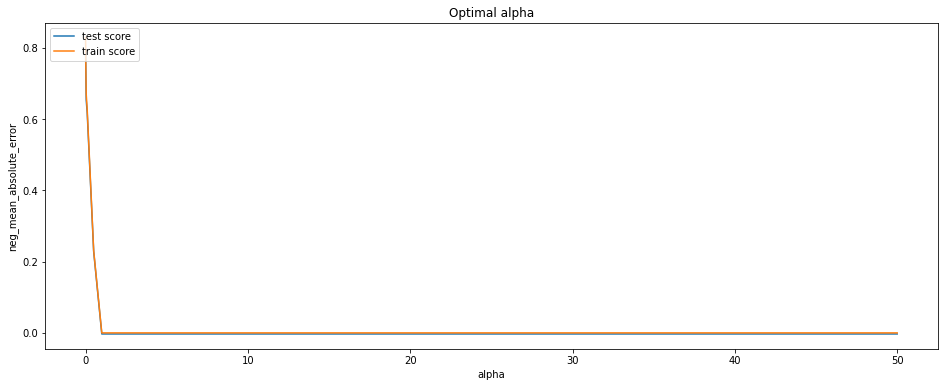

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
gridCV_plot(cv_results)
# cv_results

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0016}


In [64]:
#Fitting Lasso model for alpha = 0.0076 and printing coefficients which have been penalised

alpha = 0.0016

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col_rfe], y_train) 

lasso.coef_

array([ 2.64127668e-01,  4.40975229e-01, -4.73183503e-04, -6.26349572e-04,
       -4.06422188e-01, -4.09832515e-01, -1.03451192e-01,  3.11092105e-01,
       -0.00000000e+00,  1.29466856e-01,  0.00000000e+00, -2.62293108e-01,
        5.12470573e-01,  5.81100394e-01,  5.08013909e-01, -4.79089638e-02,
        4.47252604e-01,  1.13074839e+00,  1.00725384e+00,  3.26654816e-01,
        3.03296485e-01,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.72897472e-01,  4.36463870e-01,
       -0.00000000e+00])

In [65]:
metric2 = evaluate(lasso, X_train[col_rfe], X_test[col_rfe], y_train, y_test)

Training R2:  0.8185989547112794
Test R2:  0.8416155695312569
Training RSS:  211.87642089722561
Test RSS:  45.089863345033294
Training MSE:  0.18140104528872056
Test MSE:  0.15441734022271675


Slightly better results then ridge

In [66]:
# # Creating a table which contain all the metrics

# lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
#                        'MSE (Train)','MSE (Test)'] }

# rg_metric = pd.Series(metric1, name = 'Ridge Regression')
# ls_metric = pd.Series(metric2, name = 'Lasso Regression')

# final_metric = pd.concat([lr_table, rg_metric, ls_metric], axis = 1)

# final_metric

In [67]:
## Important features
lasso_feats = X_train[col_rfe].iloc[:,lasso.coef_!=0].columns
lasso_feats

Index(['YearBuilt', 'GrLivArea', 'YrSold', 'age', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RL',
       'LotShape_IR3', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'HouseStyle_2.5Fin', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_9',
       'Exterior1st_BrkFace', 'BsmtCond_notavailable', 'BsmtExposure_Gd'],
      dtype='object')

In [68]:
# X_train_lasso_sm = sm.add_constant(X_train[lasso_feats]) ## ?
# lm = sm.OLS(y_train,X_train_lasso_sm)
# results_lm = lm.fit() # for start_params

# results_fr = lm.fit_regularized(method='elastic_net', alpha=0.0006 , L1_wt=1 , start_params = results_lm.params)
# final = sm.regression.linear_model.OLSResults(lm, 
#                                               results_fr.params, 
#                                               lm.normalized_cov_params)



# print(final.summary())
## Important features
lasso_feats_zero = X_train[col_rfe].iloc[:,lasso.coef_==0].columns
lasso_feats_zero

Index(['MSZoning_RH', 'MSZoning_RM', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd', 'ExterCond_Po', 'BsmtQual_Fa', 'BsmtCond_Po',
       'BsmtFinType2_notavailable'],
      dtype='object')

No features dropped by lasso probably because all the features we selected are important .

**'MSZoning_RH', 'MSZoning_RM', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd', 'ExterCond_Po', 'BsmtQual_Fa', 'BsmtCond_Po',
       'BsmtFinType2_notavailable'**

###Doubling lasso alpha

In [69]:
alpha = 0.0016*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col_rfe], y_train) 

print(lasso.coef_)
metric4 = evaluate(lasso, X_train[col_rfe], X_test[col_rfe], y_train, y_test)
print(metric4)

[ 2.70997059e-01  4.52547391e-01  0.00000000e+00 -0.00000000e+00
 -3.86372485e-01 -3.61681681e-01 -0.00000000e+00  2.30540470e-01
 -0.00000000e+00  1.15340550e-01 -0.00000000e+00 -2.56691434e-02
  4.40309174e-01  5.61566391e-01  4.17930776e-01 -0.00000000e+00
  4.47267658e-01  1.07790788e+00  8.82839110e-01  2.15892751e-01
  2.43345963e-01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.07131231e-01  4.20002898e-01
 -3.74115208e-07]
Training R2:  0.8132536347496577
Test R2:  0.8360717534251934
Training RSS:  218.1197546123998
Test RSS:  46.66811134512149
Training MSE:  0.18674636525034227
Test MSE:  0.1598222991271284
[0.8132536347496577, 0.8360717534251934, 218.1197546123998, 46.66811134512149, 0.4321416032394269, 0.3997778121996372]


Test set R2 score gets slightly reduced after doubling regularization param alpha

## Important features


based on absolute value of coeffients

In [70]:
## Lets select lasso
pd.DataFrame({"importance" : abs(lasso.coef_), "Features" : col_rfe.tolist(), "value" : lasso.coef_}).sort_values("importance", ascending=False)

,importance,Features,value
17,1.077908e+00,OverallQual_9,1.077908e+00
18,8.828391e-01,OverallQual_10,8.828391e-01
13,5.615664e-01,Neighborhood_NridgHt,5.615664e-01
1,4.525474e-01,GrLivArea,4.525474e-01
16,4.472677e-01,OverallQual_8,4.472677e-01
12,4.403092e-01,Neighborhood_NoRidge,4.403092e-01
27,4.200029e-01,BsmtExposure_Gd,4.200029e-01
14,4.179308e-01,Neighborhood_StoneBr,4.179308e-01
4,3.863725e-01,MSSubClass_90,-3.863725e-01
5,3.616817e-01,MSSubClass_160,-3.616817e-01


Top 5 features:  good (8/9/10) Overall Quality, Neighborhood of Northridge Heights/Northridge/Stone Brook, GrLivArea, BsmtExposure_Gd	 positively impact house prices whereas DUPLEX(MSSubClass_90) and 2-STORY PUD - 1946 (MSSubClass_160) & NEWER , Built year negatively impact house prices

## Removing top 5 features use case

In [71]:
cols_usecase = [col for col in lasso_feats if (not col.startswith("OverallQual") and 
                                             not col.startswith("Neighborhood")
and not col.startswith("GrLivArea")
and not col.startswith("BsmtExposure")
and not col.startswith("MSSubClass"))]

cols_usecase

# cols_usecase = [col for col in lasso_feats if (not col.startswith("OverallQual_9") and 
#                                              not col.startswith("OverallQual_10")#Neighborhood
# and not col.startswith("Neighborhood_NridgHt")#GrLivArea
# and not col.startswith("Neighborhood_NoRidge")#BsmtExposure
# and not col.startswith("Neighborhood_StoneBr"))]#MSSubClass

# cols_usecase

['YearBuilt',
 'YrSold',
 'age',
 'MSZoning_FV',
 'MSZoning_RL',
 'LotShape_IR3',
 'HouseStyle_2.5Fin',
 'OverallCond_9',
 'Exterior1st_BrkFace',
 'BsmtCond_notavailable']

In [72]:
X_train2 = X_train[cols_usecase]
X_test2 = X_test[cols_usecase]

In [73]:
lasso = Lasso()
params = {'alpha': list(np.arange(0.0001,0.025,0.0005)) + [0.03 ,0.04, 0.1 , 0.5, 1, 5, 10, 20, 50]}

#LassoCV

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', #neg_mean_absolute_error
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train2, y_train) 

Fitting 5 folds for each of 59 candidates, totalling 295 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 295 out of 295 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0006000000000000001, 0.0011,
                                   0.0016, 0.0021, 0.0026, 0.0031, 0.0036,
                                   0.0041, 0.004600000000000001, 0.0051, 0.0056,
                                   0.0061, 0.006600000000000001, 0.0071, 0.0076,
                                   0.0081, 0.0086, 0.0091, 0.0096, 0.0101,
                                   0.0106, 0.011099999999999999, 0.0116, 0.0121,
                                   0.0126, 0.0131, 0.0136, 0.0141, 0.0146, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


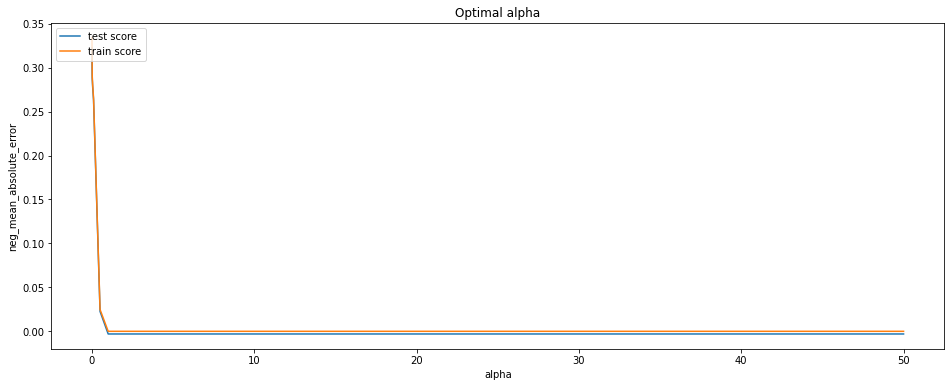

In [74]:
cv_results = pd.DataFrame(model_cv.cv_results_)
gridCV_plot(cv_results)
# cv_results

In [75]:
print(model_cv.best_params_)

{'alpha': 0.0016}


In [76]:

alpha = 0.0016

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train2, y_train) 

lasso.coef_

array([ 5.01118624e-01, -1.13852004e-02, -5.77524686e-04,  9.57188525e-02,
        3.37414392e-01,  0.00000000e+00,  6.87454106e-01,  7.74917659e-01,
        4.74154211e-01, -7.18218492e-01])

In [77]:
metric2 = evaluate(lasso, X_train2, X_test2, y_train, y_test)

Training R2:  0.33166537595942347
Test R2:  0.3292698538954234
Training RSS:  780.6148408793933
Test RSS:  190.94762370104309
Training MSE:  0.6683346240405765
Test MSE:  0.6539302181542571


Hence, on removing top 5 predictors r2 score decreases a lot.

## Conclusion





Top 5 features:  

good (8/9/10) Overall Quality, Neighborhood of Northridge Heights/Northridge/Stone Brook, GrLivArea, BsmtExposure_Gd	 positively impact house prices whereas DUPLEX(MSSubClass_90) and 2-STORY PUD - 1946 (MSSubClass_160) & NEWER , Built year negatively impact house prices